In [86]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import AllChem

## [Substructure Searching](https://www.rdkit.org/docs/GettingStartedInPython.html#substructure-searching)

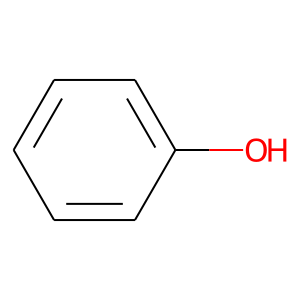

In [87]:
from rdkit.Chem import AllChem as Chem
m = Chem.MolFromSmiles("c1ccccc1O")
Draw.MolToImage(m)

In [88]:
patt = Chem.MolFromSmarts("ccO")
m.HasSubstructMatch(patt)

True

In [89]:
m.GetSubstructMatch(patt)

(0, 5, 6)

In [90]:
m.GetSubstructMatches(patt)

((0, 5, 6), (4, 5, 6))

## [Chemical Transformations](https://www.rdkit.org/docs/GettingStartedInPython.html#chemical-transformations)

### [Substructure-based transformations](https://www.rdkit.org/docs/GettingStartedInPython.html#substructure-based-transformations)

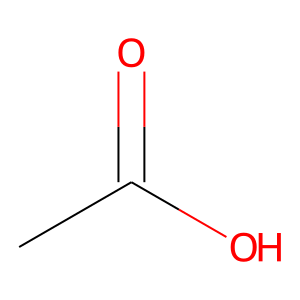

In [91]:
m2 = Chem.MolFromSmiles("CC(=O)O")
Draw.MolToImage(m2)

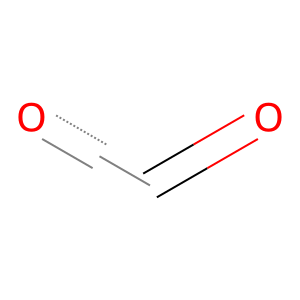

In [92]:
patt2 = Chem.MolFromSmarts("C(=O)[OH]")
Draw.MolToImage(patt2)


In [93]:
rm = AllChem.DeleteSubstructs(m2, patt2)
Chem.MolToSmiles(rm)

'C'

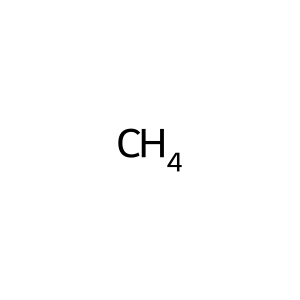

In [94]:
Draw.MolToImage(rm)

In [95]:
repl3 = Chem.MolFromSmiles("OC")
patt3 = Chem.MolFromSmarts("[$(NC(=O))]")
m3 = Chem.MolFromSmiles("CC(=O)N")
rms = AllChem.ReplaceSubstructs(m3, patt3, repl3)
Chem.MolToSmiles(rms[0])


'COC(C)=O'

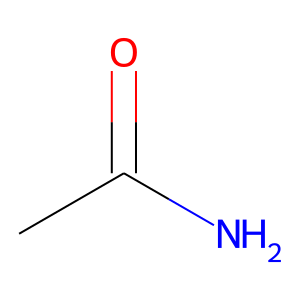

In [96]:
Draw.MolToImage(m3)

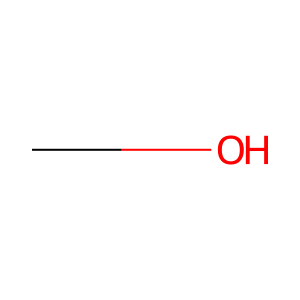

In [97]:
Draw.MolToImage(repl3)

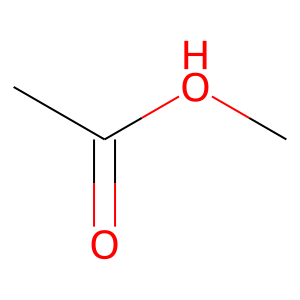

In [98]:
Draw.MolToImage(rms[0])

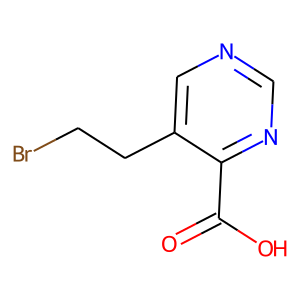

In [99]:
m4 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
no_side_chains = Chem.ReplaceSidechains(m4,core)
Draw.MolToImage(m4)

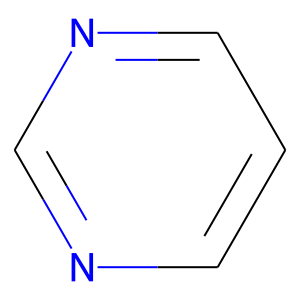

In [100]:
Draw.MolToImage(core)

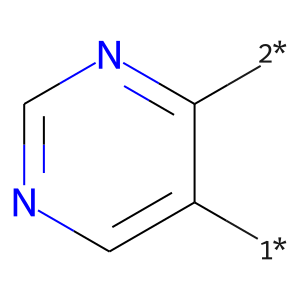

In [101]:
Draw.MolToImage(no_side_chains)

In [102]:
tmp = Chem.ReplaceCore(m4,core)
rs = Chem.GetMolFrags(tmp,asMols=True)
len(rs)

2

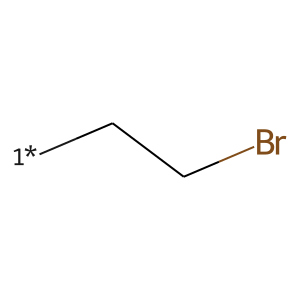

In [103]:
Draw.MolToImage(rs[0])

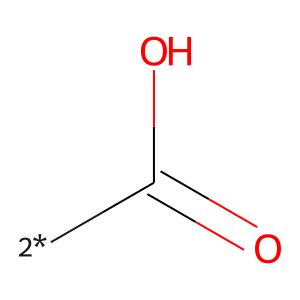

In [104]:
Draw.MolToImage(rs[1])

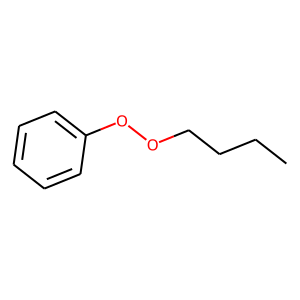

In [105]:
from rdkit.Chem.Scaffolds import MurckoScaffold
m = Chem.MolFromSmiles("c1ccccc1OOCCCC")
Draw.MolToImage(m)

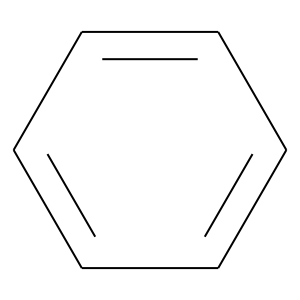

In [106]:
# with Chem.SDMolSupplier('data/cdk2.sdf') as cdk2mols:
#     m1 = cdk2mols[0]
# core = MurckoScaffold.GetScaffoldForMol(m1)
core = MurckoScaffold.GetScaffoldForMol(m)
Chem.MolToSmiles(core)
Draw.MolToImage(core)

In [107]:
fw = MurckoScaffold.MakeScaffoldGeneric(core)
Chem.MolToSmiles(fw)

'C1CCCCC1'

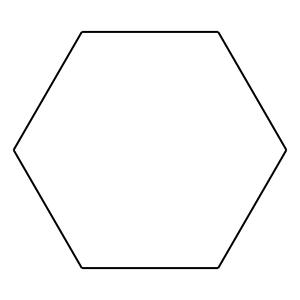

In [108]:
Draw.MolToImage(fw)

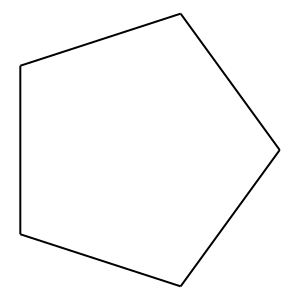

In [109]:
Draw.MolToImage(Chem.MolFromSmiles('C1CCCC1'))

In [110]:
def SmilesToMolAndImage(smiles):
    mol = Chem.MolFromSmiles(smiles)
    image = Draw.MolToImage(mol)
    return mol, image

In [114]:
def SmilesToImage(smiles):
    image = Draw.MolToImage(Chem.MolFromSmiles(smiles))
    return image

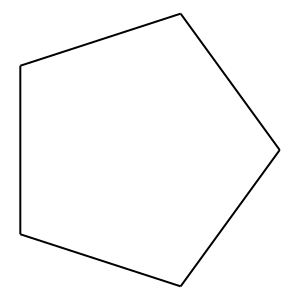

In [112]:
mol, image = SmilesToMolAndImage("C1CCCC1")
image

In [113]:
SmilesToMolAndImage("OO")

(<rdkit.Chem.rdchem.Mol at 0x7f8bd0e93b20>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x7F8BD0F319D0>)

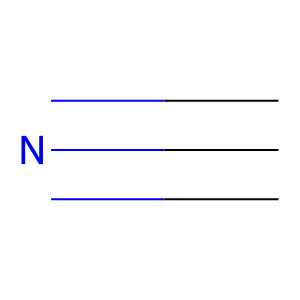

In [118]:
SmilesToImage("C#N")

In [124]:
from rdkit.Chem import rdFMCS
mol1 = Chem.MolFromSmiles("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C")
mol2 = Chem.MolFromSmiles("CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC")
mol3 = Chem.MolFromSmiles("c1(C=O)cc(OC)c(O)cc1")
mols = [mol1, mol2, mol3]
res = rdFMCS.FindMCS(mols)
res.numAtoms, res.numBonds, res.smartsString, res.canceled

(10, 10, '[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]', False)

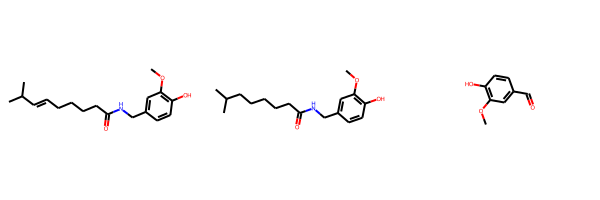

In [131]:
Draw.MolsToGridImage(mols)

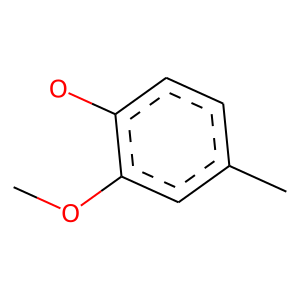

In [127]:
smart_mol = Chem.MolFromSmarts(res.smartsString)
Draw.MolToImage(smart_mol)

In [212]:
def SmilesMCStoImage(*smiles, **kwargs):
     mols = [Chem.MolFromSmiles(smile) for smile in smiles]
     res = rdFMCS.FindMCS(mols, **kwargs)
     mcs_mol = Chem.MolFromSmarts(res.smartsString)
     smarts = res.smartsString
     # print(f"{smarts=}")
     smart_mol = Chem.MolFromSmarts(smarts)
     # smarts = Draw.MolToImage(smart_mol)
     smarts_and_mols = [smart_mol] + mols
     # print(f"{mols[0]=}")
     # print(f"{mols[0].GetSubstructMatch(mcs_mol)=}")
    
     matches = [""] + [mol.GetSubstructMatch(mcs_mol) for mol in mols]
     # matches = [mol.GetSubstructMatch(mcs_mol) for mol in mols]

     p = Chem.MolFromSmiles(smiles[0])
     # subms = [x for x in mols if x.HasSubstructMatch(p)]
     subms = [x for x in smarts_and_mols if x.HasSubstructMatch(p)]
     # print(f"{len(subms)=}")

     Chem.Compute2DCoords(p)
     for m in subms:
          _ = AllChem.GenerateDepictionMatching2DStructure(m, p)

     return Draw.MolsToGridImage(smarts_and_mols, highlightAtomLists=matches)
     # return Draw.MolsToGridImage(mols, highlightAtomLists=matches)

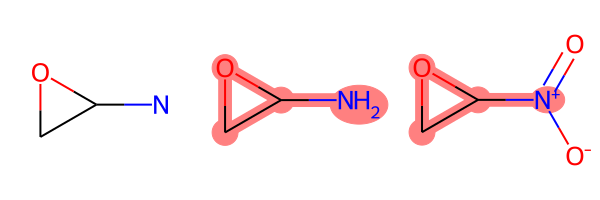

In [213]:
SmilesMCStoImage("NC1OC1", "C1OC1[N+](=O)[O-]")

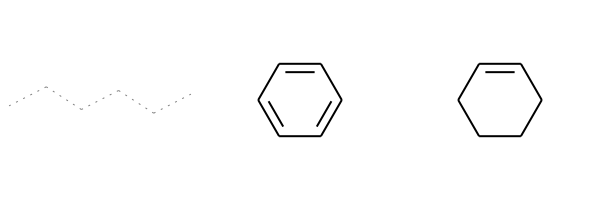

In [164]:
SmilesMCStoImage("c1ccccc1", "C1CCCC=C1")

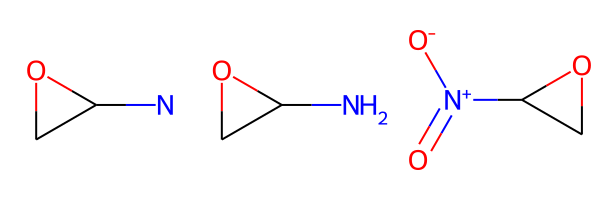

In [177]:
SmilesMCStoImage("NC1OC1", "C1OC1[N+](=O)[O-]")

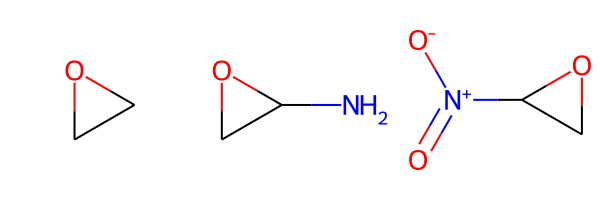

In [175]:
SmilesMCStoImage("NC1OC1", "C1OC1[N+](=O)[O-]", matchValences=True)